In [19]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure
%matplotlib inline
plt.rcParams["font.size"] = 15

### Let's take an image from scikit learn's dataset

In [165]:
#Here Let's load the images and see how many images do we have
images = load_sample_images().images
len(images)

2

In [166]:
#Let's checkout the dimension of our first image
flower_img = images[1]
height, width, channels = flower_img.shape
print(height, width, channels)

427 640 3


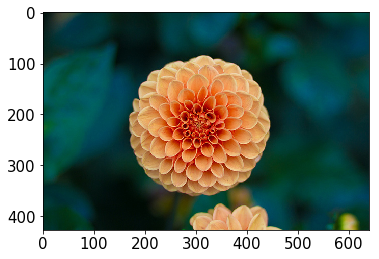

In [167]:
#Now let's plot the image and see how it looks
plt.imshow(flower_img)
plt.show()

### Let's try our hands on tensorflow and filters

In [168]:
#So we want to apply some filter now, so let's define
filters=np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3,:,:,1] = 1

In [169]:
X = tf.placeholder(tf.float32 , shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

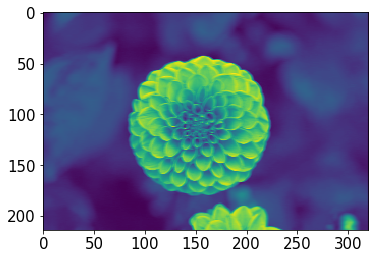

In [170]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: np.array(images, dtype=np.float32)})
    
plt.imshow(output[1,:,:,1])
plt.show()

### Let's apply some pooling here 

In [99]:
pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

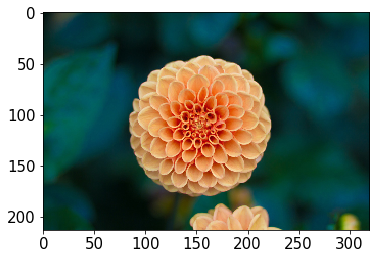

In [100]:
with tf.Session() as sess:
    output = sess.run(pool, feed_dict={X: np.array(images, dtype=np.float32)})
    
plt.imshow(output[1].astype(np.uint8))
plt.show()
#Check the axis in both the image to see the difference

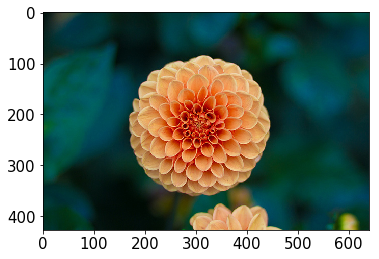

In [101]:
plt.imshow(flower_img)
plt.show()